# Центральная предельная теорема своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Формирование выборки аргус-распредления

In [2]:
chi = 3
mu = 0.5
sigma = 1.0

# создаем аргус-распредление с заданными параметрами
argus_rv = sts.argus(chi = chi, loc = mu, scale = sigma)

# сгенерируем выборку из 1000 значений
sample = argus_rv.rvs(size=1000)

### Гистограмма выборки

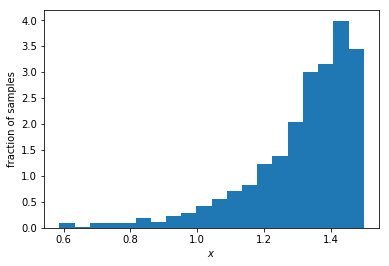

In [3]:
plt.hist(sample, bins=20, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$');

### Теоретическая плотность распределения

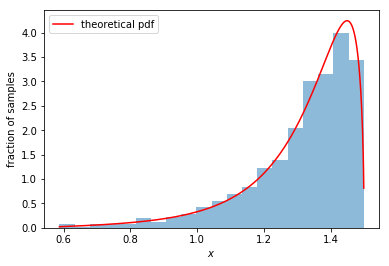

In [4]:
plt.hist(sample, bins=20, normed=True, alpha=0.5)
plt.ylabel('fraction of samples')
plt.xlabel('$x$');

x = np.linspace(min(sample), max(sample), 1000)
pdf = argus_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', color = 'r', alpha=1)
plt.legend();

In [20]:
mu, var = argus_rv.stats() #получим значения среднего и дисперсии для заданного аргус-распредления

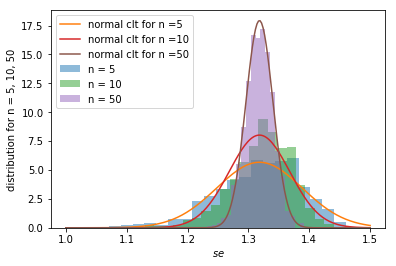

In [24]:
n = np.array([5, 10, 50])
x = np.linspace(1, 1.5, 200)
plt.ylabel('distribution for n = 5, 10, 50')
plt.xlabel('$se$') 

for k in n:
    se = np.zeros(1000)
    for i in range(1000):
        rvs = argus_rv.rvs(size=k)
        se[i] = np.mean(rvs) # выборочное среднее для i-й выборки
    
    plt.hist(se, bins=20, label = 'n = ' + str(k), normed=True, alpha=0.5)
      
    norm_rv = sts.norm(loc=mu, scale=np.sqrt(var/k))  # создаем нормальное распредление с параметрами рампределения
    pdf = norm_rv.pdf(x) 
    plt.plot(x, pdf, label='normal clt for n =' + str(k), alpha=1)
    plt.legend(); 
    

Как видно из графиков, с ростом n точность аппроксимации распределения выборочных средних нормальным увеличивается